<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/086%20-%20Lesson%2086%20(Support%20Vector%20Machines%20-%20MNIST%20Digits%20Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 86: Support Vector Machines - MNIST Digits Classification

### Teacher-Student Activities

In the previous classes, you learn to build an SVM model to predict different species of Iris flower. In general, you learn to build a multiclass classification model using SVM. In this class, you will learn to classify images using SVM. In particular, you will learn to classify the images of handwritten digits using SVM.


**Data Description**

For this problem, we will use the MNIST data which is a huge dataset containing handwritten digits. We don't have actual images rather we have its pixels.

Since each image has $28 \times 28$ pixels and each pixel form a feature. There are 784 features. These features are recorded in CSV files. One for the training a model and another for testing the model. The **pixel values** of each digit (image) comprise the features, and the actual number between 0 and 9 is the label.

Here are the examples of the images of the handwritten used in the dataset.

<center><img src = "https://s3-whjr-v2-prod-bucket.whjr.online/359b49aa-47db-46f6-b4e7-7b3d8dc99f46.png" width = 700></center>


---

#### Activity 1: Loading Data^

Let's load both the training and the test datasets. Here are the links to the required two CSV files:

1. **Train set:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/train.csv

2. **Test set:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/test.csv

**Dataset credits:**
```
LeCun, Y., Cortes, C., & Burges, C. (2010). MNIST handwritten digit database. ATT Labs [Online].
 http://yann.lecun.com/exdb/mnist/
```

In [ ]:
# S1.1: Import the libraries and load the CSV files.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/train.csv')
test_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/test.csv')

Now, get the information on the both DataFrames.

In [ ]:
# S1.2: Get the information on the train dataset.
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


There are 42000 rows and 785 columns in the train dataset.

In [ ]:
# S1.3: Get the information on the test dataset.


There are 28000 rows and 784 columns in the test dataset. This means we don't have the labels column for the test set. You verify this by printing the first and last five columns of the test set.

In [ ]:
# S1.4: Print the first and last five columns of both the test and train datasets.
(train_df.head())


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
(test_df.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, the train set has the `label` column but the test set doesn't.

Now, let's print the first ten rows of the DataFrame containing the train set.

In [ ]:
# S1.5: Print the first ten rows of the DataFrame containing the train set.
train_df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see:

- The first row contains the pixel values of the image of the handwritten digit $1$.

- Similarly, the second row contains the pixel values of the image of the handwritten digit $0$.

- Similarly, the third row contains the pixel values of the image of the handwritten digit $1$.


$$\vdots$$

- The $10^{\text{th}}$ row contains the pixel values of the image of the handwritten digit $3$.

Let's print the image of the digit $4$.


---

#### Activity 2: The `matplotlib.pyplot.imshow()` Function^^

To display an image from its pixel values, you can use the `imshow()` function of the `matplotlib.pyplot` module. So, to create the image of the digit 4 from its pixel values, we will follow the steps given below:

1. Create a 1D array containing the pixel values from the training DataFrame for the image and store it in a variable.

2. Then reshape the above array into a 2D array having 28 rows and 28 columns.

3. Use the `imshow()` function of the `matplotlib.pyplot` module and pass the following inputs to the function:
   - The $28 \times 28$ array containing the pixel values of an image
   
   - The colour mapping value for the image. We will create a grayscale image hence, we will set the colormapping value using the parameters `cmap = 'gray', vmin = 0, vmax = 255`.

   **Note:** There are other parameters that can be passed to `imshow()` function as inputs. But for now, we will pass the above parameters only.

4. Provide the title to the image.



In [ ]:
# S2.1: Display the image of the handwritten digit 4 from the train DataFrame.
pixel1 = train_df.loc[3,train_df.columns[1:]]
pixel1

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 3, Length: 784, dtype: int64

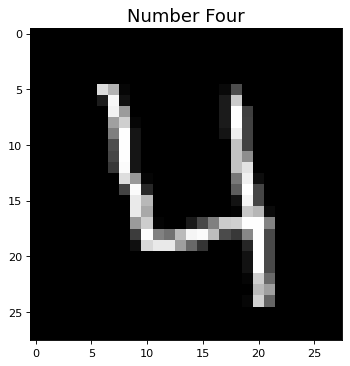

In [ ]:
four_pixels = pixel1.values.reshape(28,28)

plt.figure(figsize = (5,5), dpi = 81)
plt.title("Number Four", fontsize = 16)
plt.imshow(four_pixels, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In the above code:

- `four_pixels = train_df.iloc[3, 1:]` part gets the pixel values of the image of the digit 4 that are stored in the $4^{\text{th}}$ row of the DataFrame.

- `four_pixels = four_pixels.values.reshape(28, 28)` part first gets the pixel values from the Pandas series in the form of a NumPy array and then reshapes the 1D array into a 2D array having 28 rows and 28 columns.

- `plt.figure(figsize = (5, 5), dpi = 81)` part sets the figure size.

- `plt.title("Handwritten Digit 4", fontsize = 16)` part sets the title of the plot.

- `plt.imshow(four_pixels, cmap = 'gray', vmin = 0, vmax = 255)` part creates a 2D image in gray colour.

If you look at the axes of the above image, you can see that nearly the first four and last three rows are blank. Similarly, the first five and last five columns are blank which is denoted by the black colour. So let's print the rows 5 to 26 and columns 5 to 25 of the `four_pixel` NumPy array to see the pixel values of the image of the handwritten digit 4.

In [ ]:
# S2.2: Print the rows 5 to 26 and columns 5 to 25 of the 'four_pixel' NumPy array to see the pixel values of the image of the handwritten digit 4.
print(four_pixels[5:26, 5:25])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0
    0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0
    0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0
    0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0
    0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0
    0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0
    0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0
    0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0
    0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0
    0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0
    0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0
    0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182

From the above output, you can see the non-zero pixel values arranged in the pattern of digit 4.

**It is to be noted that the pixel values for a grayscale image range from 0 to 255.**

You can also look at the descriptive statistics for the first 10 images in the train DataFrame.

---


#### Activity 3: The `pandas.set_index()` Function^^^

Before printing the descriptive statistics values of the first 10 images in the train DataFrame, let's learn the `set_index()` function of the `pandas` module. It is used to set another column or 1D array as an index of a Pandas DataFrame.

**Syntax:** `pandas_dataframe.set_index(keys, inplace = False)`

where

- `keys` is an existing column in a `pandas_dataframe` or a new Pandas series having the same length as the number of rows in `pandas_dataframe`.
- `inplace` is a parameter that defines whether the indices to be set temporarily (locally) or permanently (globally). `inplace = False` means set index temporarily (locally)

In [ ]:
# S3.1: Set the indices of the 'train_df' DataFrame temporarily to the values in the 'label' column.
train_df.set_index(train_df['label'], inplace = False)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, the indices of the `train_df` are the values of the `label` column. To verify whether the change is temporary, you may print the first five rows of the `train_df` DataFrame again.

In [ ]:
# S3.2: Print the first-five rows of the 'train_df' DataFrame.
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, the indices of the `train_df` are consecutive whole numbers.

You can set any other values as indices of a Pandas DataFrame. So let's test this theory by temporarily setting `row 0, row 1, row 2 ... ` values as indices of the `train_df` DataFrame.

In [ ]:
# S3.3: Create a Pandas series containing the 'row 0, row 1, row 2 ...' values.
series1 = pd.Series([f"Row {i}" for i in range(train_df.shape[0])])
print(series1)

0            Row 0
1            Row 1
2            Row 2
3            Row 3
4            Row 4
           ...    
41995    Row 41995
41996    Row 41996
41997    Row 41997
41998    Row 41998
41999    Row 41999
Length: 42000, dtype: object


In [ ]:
train_df.set_index(series1, inplace = False)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
Row 0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Row 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Row 2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Row 3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Row 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Row 41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Row 41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Row 41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Row 41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now replace the original indices with the values stored in the above Pandas series.

In [ ]:
# S3.4: Temporarily replace the original indices with the values stored in the above Pandas series.
train_df.set_index(keys = ["label", series1])

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
label                                                                     
1     Row 0           0       0       0       0       0       0       0   
0     Row 1           0       0       0       0       0       0       0   
1     Row 2           0       0       0       0       0       0       0   
4     Row 3           0       0       0       0       0       0       0   
0     Row 4           0       0       0       0       0       0       0   
...                 ...     ...     ...     ...     ...     ...     ...   
      Row 41995       0       0       0       0       0       0       0   
1     Row 41996       0       0       0       0       0       0       0   
7     Row 41997       0       0       0       0       0       0       0   
6     Row 41998       0       0       0       0       0       0       0   
9     Row 41999       0       0       0       0       0       0       0   

                 pixel7  pixel8  pixel9  ...  pixel774  pixel775  pixel776  \
label                                    ...                                 
1     Row 0           0       0       0  ...         0         0         0   
0     Row 1           0       0       0  ...         0         0         0   
1     Row 2           0       0       0  ...         0         0         0   
4     Row 3           0       0       0  ...         0         0         0   
0     Row 4           0       0       0  ...         0         0         0   
...                 ...     ...     ...  ...       ...       ...       ...   
      Row 41995       0       0       0  ...         0         0         0   
1     Row 41996       0       0       0  ...         0         0         0   
7     Row 41997       0       0       0  ...         0         0         0   
6     Row 41998       0       0       0  ...         0         0         0   
9     Row 41999       0       0       0  ...         0         0         0   

                 pixel777  pixel778  pixel779  pixel780  pixel781  pixel782  \
label                                                                         
1     Row 0             0         0         0         0         0         0   
0     Row 1             0         0         0         0         0         0   
1     Row 2             0         0         0         0         0         0   
4     Row 3             0         0         0         0         0         0   
0     Row 4             0         0         0         0         0         0   
...                   ...       ...       ...       ...       ...       ...   
      Row 41995         0         0         0         0         0         0   
1     Row 41996         0         0         0         0         0         0   
7     Row 41997         0         0         0         0         0         0   
6     Row 41998         0         0         0         0         0         0   
9     Row 41999         0         0         0         0         0         0   

                 pixel783  
label                      
1     Row 0             0  
0     Row 1             0  
1     Row 2             0  
4     Row 3             0  
0     Row 4             0  
...                   ...  
      Row 41995         0  
1     Row 41996         0  
7     Row 41997         0  
6     Row 41998         0  
9     Row 41999         0  

[42000 rows x 784 columns]

Now let's calculate the mean, std, min, quartiles, and max values of the pixels of the first 10 images present in the `train_df` DataFrame:

In [ ]:
# S3.5: Print descriptive statistics for the pixel values of first 10 images in the train DataFrame.
train_df.set_index(keys = "label").head(10).T.describe()

label,1,0,1,4,0,0,7,3,5,3
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,21.235969,56.899235,17.123724,19.164541,65.169643,29.414541,21.877551,30.979592,35.612245,40.267857
std,64.660241,99.211727,59.658939,57.787051,104.862304,72.981989,63.035499,70.651698,80.562012,84.928290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,66.250000,0.000000,0.000000,131.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,255.000000,255.000000,255.000000,255.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000


As you can see, the pixel values for a grayscale image goes from 0 to 255.

Now, to practice the usage of the `imshow()` function, let's create an image of another handwritten digit, say $6$ from the pixel values of its image. For this, first, you will have to get the rows that contain the pixel values of the images of $6$.


In [ ]:
# S3.6: Create a DataFrame from the training DataFrame that contain the pixel values of the images of the digit 6.
six_df = train_df.loc[train_df['label'] == 6, :]
six_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41921,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41927,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41967,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, from the above DataFrame, let's create an image of the first instance of the image of digit $6$. Its index is 21.

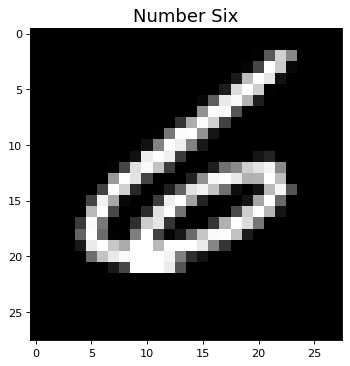

In [ ]:
# S3.7: Create an image from the pixel values of the image of the digit 6 that are stored in row 21.

new_six_df = six_df.iloc[0, 1:].values.reshape(28,28)

plt.figure(figsize = (5,5), dpi = 81)
plt.title("Number Six", fontsize = 16)
plt.imshow(new_six_df, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

Now, let's print the part of the array containing the pixel values of the above image such that their arrangement resembles the digit 6.

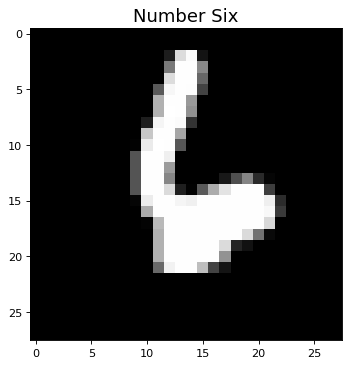

In [ ]:
# S3.8: Print the rows 2 to 22 and columns 5 to 21 of the 'six_pixels' array.
new_six_df = six_df.iloc[1, 1:].values.reshape(28,28)

plt.figure(figsize = (5,5), dpi = 81)
plt.title("Number Six", fontsize = 16)
plt.imshow(new_six_df, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
print(new_six_df[2:22, 5:21])

[[  0   0   0   0   0   0   0  29 220 251  19   0   0   0   0   0]
 [  0   0   0   0   0   0   0 121 254 254 136   0   0   0   0   0]
 [  0   0   0   0   0   0   0 220 254 254 103   0   0   0   0   0]
 [  0   0   0   0   0   0  89 247 254 253  67   0   0   0   0   0]
 [  0   0   0   0   0   0 177 254 254 153   0   0   0   0   0   0]
 [  0   0   0   0   0   0 177 255 254 145   0   0   0   0   0   0]
 [  0   0   0   0   0  30 245 254 251  51   0   0   0   0   0   0]
 [  0   0   0   0   0 199 254 254 166   0   0   0   0   0   0   0]
 [  0   0   0   0   2 235 255 254  86   0   0   0   0   0   0   0]
 [  0   0   0   0  84 254 254 239   0   0   0   0   0   0   0   0]
 [  0   0   0   0  84 254 254 155   0   0   0   0   0   0   0   0]
 [  0   0   0   0  84 254 254 134   0   0   0   0  24  79 133  42]
 [  0   0   0   0  84 254 254 219  31   2  89 172 228 254 254 254]
 [  0   0   0   0   5 236 254 254 245 240 254 254 254 254 254 254]
 [  0   0   0   0   0 170 254 254 254 254 254 254 254 254 254 

Now, for a machine learning algorithm (in this case, SVM), to correctly identify an image for a digit, it has to figure out the arrangement of pixel values for a digit on a 2D grid (in this case, $28 \times 28$ grid).

Knowing this, we can now build a machine learning model (in this case, SVM) to classify the images of different handwritten digits.


---

#### Activity 4: Check for Data Imbalance

Before building a classification model, let's check whether the training dataset is imbalanced or not.

In [ ]:
# S4.1: Find out the counts of records for each digit in the training dataset.
train_df['label'].value_counts(dropna = False, normalize = True) * 100

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

**Note:**

1. The `dropna = False` parameter counts the number of `NA` or `null` values if they are present in a Pandas series.

2. The `normalize = True` parameter calculates the count of a value as the fraction of the total number of records.

From the count of labels, we can see that the training dataset is balanced. Hence, we can now proceed to build a classification model.

---

### **Project**
You can now attempt the **Applied Tech Project 86 - Support Vector Machines - MNIST Digits Classification** on your own.

**Applied Tech Project 86 - Support Vector Machines - MNIST Digits Classification**: https://colab.research.google.com/drive/1Q_65eybSFJ6dCCmb7xkux72tkLBu2I1H

---